# Homework Requirements:
a.	You have to use “Linear Regression Model” only, you can tweak it for better results.
b.	AIM: predicting “sqft_living” , means outpur variable (Y) = sqft_living column
c.	For input variables (X) , you can choose any one or many of the given columns in the data set.  
d.	All submissions should have following sections and some commentary on what numbers mean to you. 
    i.	Data Preprocessing
    ii.	Train & test data
    iii.	Model training
    iv.	Model testing
    v.	Evaluation
    
Data preprocessing as per classroom example and https://medium.com/datadriveninvestor/data-preprocessing-for-machine-learning-188e9eef1d2c & https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

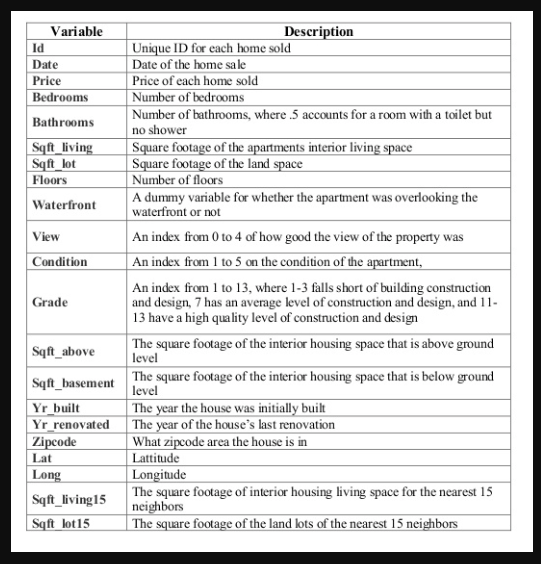
https://storage.googleapis.com/kaggle-forum-message-attachments/479761/11440/Screenshot%202019-02-27%20at%205.26.24%20PM.png

## Step 1 - Data Preprocessing

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
#Step 2: Importing the dataset
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.dtypes

In [ ]:
#Taking care of Missing Data in Dataset
#Checking whether we have any null values in our dataset
df.isnull().any()

In [ ]:
#defining the attributes and labels
X = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat', 'long','sqft_living15','sqft_lot15']]
y = df['sqft_living']

## Step 2: Train and Test data

In [ ]:
#Step 5
#splitting the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#testing out sqft_above
print(X_train.shape)
print(X_test.head())
print(y_train.head())
print(y_test.shape)

## Step3: Model Training

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
#because this is a multivariable linear regression, i am checking out the optimal coefficients that the model has chosen
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

It seems that the optimal coefficients are sqft above and sqft basement combined

In [ ]:
#Checking the R2 for the model
r_sq = regressor.score(X_train, y_train)
print('Coeffiencient of determination(R2):', r_sq)
print('Intercept:', regressor.intercept_)
print('Slope: ', regressor.coef_)

## Step 4: Model Testing

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

In [ ]:
df.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Step 5: Evaluation

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The model is extremely accurate